In [53]:
path = "dataset/praprocessed_dataset.csv"

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [55]:
data = pd.read_csv(path)

In [56]:
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


mencari tipe data dari masing" fitur

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   19536 non-null  object 
 1   stasiun   19536 non-null  object 
 2   pm10      18778 non-null  float64
 3   so2       18968 non-null  float64
 4   co        19144 non-null  float64
 5   o3        18890 non-null  float64
 6   no2       19008 non-null  float64
 7   max       19536 non-null  float64
 8   critical  19536 non-null  object 
 9   categori  19536 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.5+ MB


melihat missing value

In [58]:
# count missing values each row
data.isnull().sum()

tanggal       0
stasiun       0
pm10        758
so2         568
co          392
o3          646
no2         528
max           0
critical      0
categori      0
dtype: int64

menghilangkan missing value dengan dropna()

In [59]:
# Drop rows with any missing values
data.dropna(axis=0, inplace=True)

In [60]:
# count missing values each row
data.isnull().sum()

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

mengubah data kategorikal menjadi numeric vector menggunakan one-hot encoding

In [61]:
# Convert remaining categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['critical'])

In [62]:
data.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,categori,critical_CO,critical_NO2,critical_O3,critical_PM10,critical_PM25,critical_SO2
0,2010-01-01,DKI1 (Bunderan HI),60.0,4.0,73.0,27.0,14.0,73.0,SEDANG,True,False,False,False,False,False
1,2010-01-02,DKI1 (Bunderan HI),32.0,2.0,16.0,33.0,9.0,33.0,BAIK,False,False,True,False,False,False
2,2010-01-03,DKI1 (Bunderan HI),27.0,2.0,19.0,20.0,9.0,27.0,BAIK,False,False,False,True,False,False
3,2010-01-04,DKI1 (Bunderan HI),22.0,2.0,16.0,15.0,6.0,22.0,BAIK,False,False,False,True,False,False
4,2010-01-05,DKI1 (Bunderan HI),25.0,2.0,17.0,15.0,8.0,25.0,BAIK,False,False,False,True,False,False


data tanggal dan categori tidak termasuk dalam fitur, dan categori dimasukkan sebagai output

In [63]:
# Splitting the dataset into features and target variable
X = data.drop(columns=['tanggal', 'categori', 'stasiun'])  # Features
y = data['categori']  # Target variable

Membagi data menjadi data train dan data test dengan ratio 70:30, menggunakan klasifikasi decision tree

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the labels for test set
y_pred = model.predict(X_test)

print(f"Total train data : {len(X_train)}")
print(f"Total test data : {len(X_test)}")

Total train data : 11980
Total test data : 5135


In [65]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9996105160662123
                    precision    recall  f1-score   support

              BAIK       1.00      1.00      1.00       928
SANGAT TIDAK SEHAT       1.00      1.00      1.00        41
            SEDANG       1.00      1.00      1.00      3445
       TIDAK SEHAT       1.00      1.00      1.00       721

          accuracy                           1.00      5135
         macro avg       1.00      1.00      1.00      5135
      weighted avg       1.00      1.00      1.00      5135

[[ 927    0    1    0]
 [   0   41    0    0]
 [   1    0 3444    0]
 [   0    0    0  721]]


confusion matrix hasil klasifikasi

<Axes: >

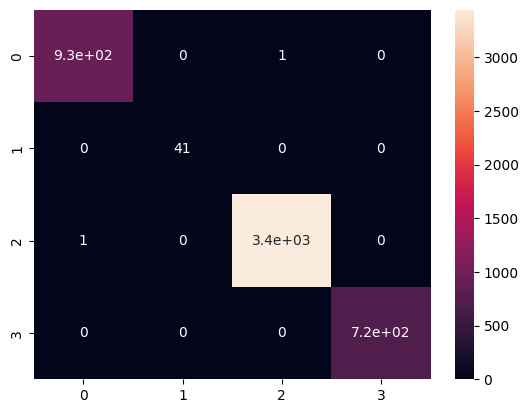

In [66]:
# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [67]:
# Feature Importance
print("\nFeature Importance:")
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))


Feature Importance:
max              0.968750
no2              0.029190
so2              0.001620
pm10             0.000441
co               0.000000
o3               0.000000
critical_CO      0.000000
critical_NO2     0.000000
critical_O3      0.000000
critical_PM10    0.000000
critical_PM25    0.000000
critical_SO2     0.000000
dtype: float64


Pengujian menggunakan input data baru

In [73]:
import pandas as pd

# Define a function to preprocess and predict new input data
def preprocess_and_predict(new_data, model, feature_columns):
    # Convert the new data to a DataFrame
    new_data_df = pd.DataFrame(new_data)
    
    # Get dummies for categorical columns
    new_data_df = pd.get_dummies(new_data_df, columns=['stasiun', 'critical'])
    
    # Align the new data with the feature columns of the model
    new_data_df = new_data_df.reindex(columns=feature_columns, fill_value=0)
    
    # Predict the category using the trained model
    predictions = model.predict(new_data_df)
    
    return predictions

# Example new data input
new_data = [{
    'tanggal': '2024-05-21',
    'stasiun': 'DKI1 (Bunderan HI)',
    'pm10': 10.0,
    'so2': 4.0,
    'co': 118.0,
    'o3': 5.0,
    'no2': 0,
    'max': 118.0,
    'critical': 'CO'
}]

# Use the function to predict the category of the new input data
predicted_category = preprocess_and_predict(new_data, model, X_train.columns)
print(predicted_category)


['TIDAK SEHAT']


Visualisasi Tree

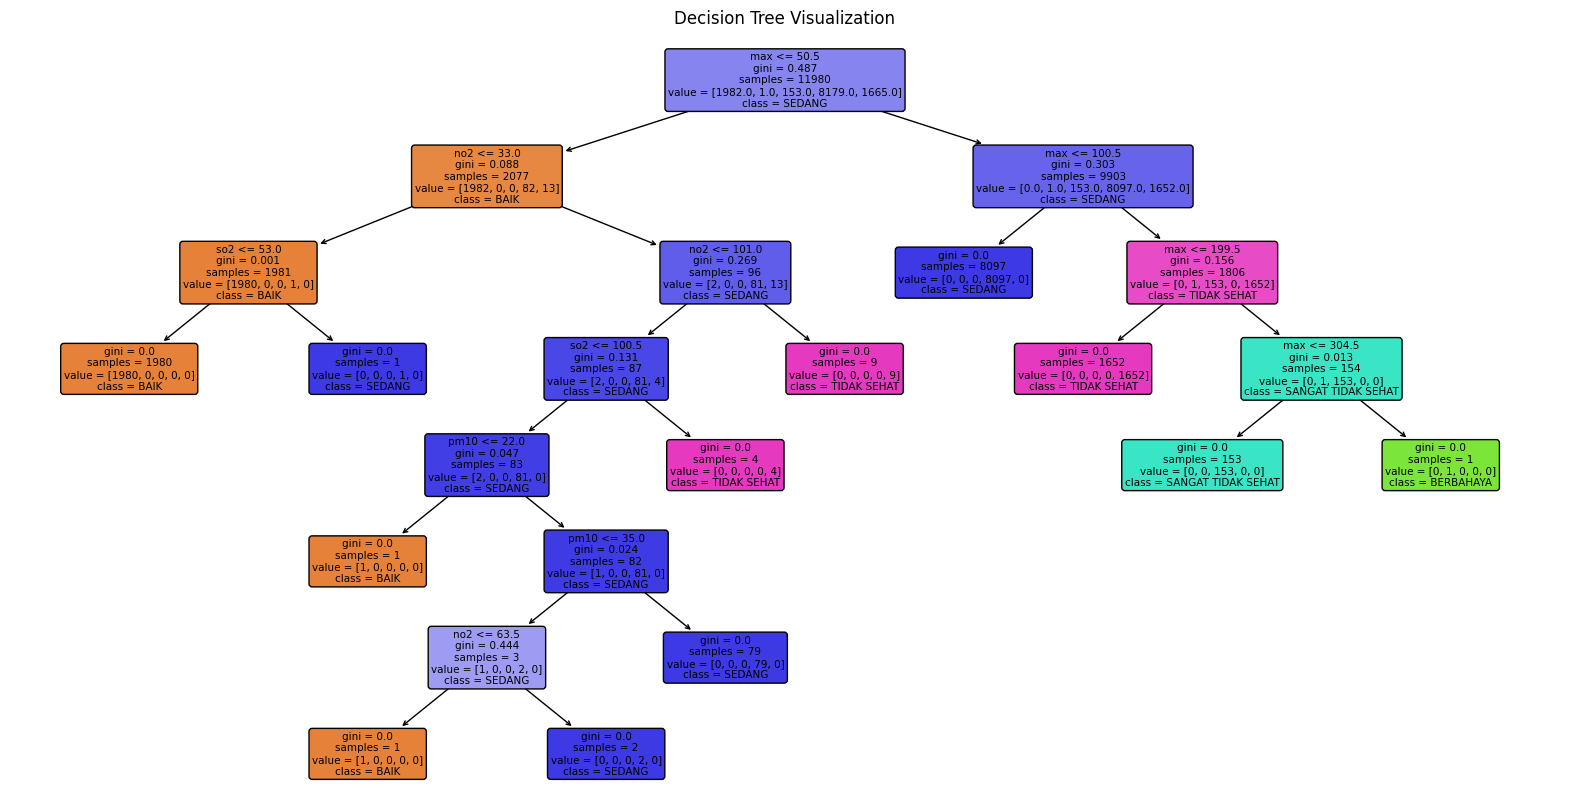

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


pengujian ulang menggunakan encoder dan classifier yang berbeda untuk pemastian akurasi

Accuracy: 0.9996105160662123
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           2       0.98      1.00      0.99        41
           3       1.00      1.00      1.00      3445
           4       1.00      1.00      1.00       721

    accuracy                           1.00      5135
   macro avg       0.99      1.00      1.00      5135
weighted avg       1.00      1.00      1.00      5135

[[ 927    0    1    0]
 [   0   41    0    0]
 [   0    0 3445    0]
 [   0    1    0  720]]


<Axes: >

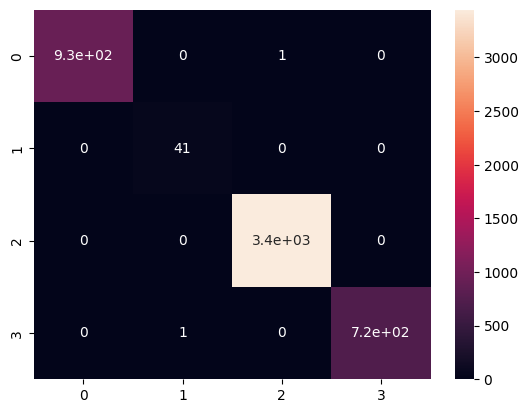

In [70]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada label kelas
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Latih model
model_xgb.fit(X_train, y_train_encoded)

# Lakukan prediksi
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test_encoded, y_pred_xgb))
print(confusion_matrix(y_test_encoded, y_pred_xgb))

# Tampilkan confusion matrix
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_xgb), annot=True)


Dengan melihat akurasi yang selalu mendekati 1 dan sedikitnya error yang terjadi, menunjukkan bahwa data yang diuji memang sangat bagus, hal ini juga diakibatkan oleh data yang sangat banyak dengan fitur yang tidak terlalu banyak, sehingga akurasi klasifikasi sangat tinggi